In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import ast

## Exploring data

### Read cleaned data from file

In [2]:
cleaned_df = pd.read_csv('../data/processed/music_video_data.csv')

In [3]:
cleaned_df

,Id,View,Like,Duration,Channel_name,Subscriber,Country,Publish_time,Hasgtag,Most view per day,Most-view-date,Highest rank,Charted-duration,Song Name,Artist Name,Release Date (Spotify),Popularity Score (Spotify),Genre
0,9bZkp7q19f0,4.977100e+09,27830052.0,0:04:13,officialpsy,18400000.0,NaN,2012-07-15 07:46:32,4.0,14924298,2012-12-21,1.0,482.0,Gangnam Style (강남스타일),PSY,2012-01-01,75,"['k-rap', 'korean old school hip hop']"
1,hT_nvWreIhg,3.927344e+09,17491157.0,0:04:44,OneRepublicVEVO,5470000.0,NaN,2013-05-31 07:00:36,2.0,3288973,2018-11-10,4.0,482.0,Counting Stars,OneRepublic,2013-01-01,88,['panamanian pop']
2,JGwWNGJdvx8,6.149237e+09,32323841.0,0:04:24,Ed Sheeran,53900000.0,NaN,2017-01-30 10:57:50,3.0,14390704,2017-05-13,1.0,356.0,Shape of You,Ed Sheeran,2017-03-03,88,"['colombian pop', 'dance pop', 'latin pop', 'p..."
3,lp-EO5I60KA,3.700048e+09,14912926.0,0:04:57,Ed Sheeran,53900000.0,NaN,2014-10-07 13:57:37,3.0,3771622,2015-02-14,3.0,304.0,Thinking out Loud,Ed Sheeran,2014-06-21,85,"['latin pop', 'puerto rican pop']"
4,CevxZvSJLk8,3.918655e+09,16596026.0,0:04:30,KatyPerryVEVO,24600000.0,US,2013-09-05 20:00:22,0.0,11294380,2013-09-07,2.0,445.0,Roar,Katy Perry,2013-10-18,74,"['canadian pop', 'pop']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,HC172grgTwU,3.250905e+08,1693226.0,0:05:17,Lokdhun Punjabi,13300000.0,IN,2016-01-18 03:30:00,8.0,216961,2021-02-15,21.0,25.0,Same Time Tomorrow,Brandon Davis,2023-09-01,23,"['desi pop', 'filmi', 'punjabi pop']"
2496,Fd7lYEtevxQ,3.247416e+08,867653.0,0:03:07,Ruby Bảo An,1640000.0,NaN,2011-01-31 13:52:25,8.0,842423,2020-05-01,21.0,25.0,Xúc Xắc Xúc Xẻ,Bé Bảo An,2020-08-08,11,['modern country pop']
2497,Fp8msa5uYsc,3.244410e+08,3355081.0,0:03:33,JustinBieberVEVO,31500000.0,US,2021-10-08 04:00:10,3.0,3261913,2021-10-08,14.0,10.0,Ghost,Justin Bieber,2021-03-19,89,"['agronejo', 'arrocha', 'sertanejo', 'sertanej..."
2498,6EGg0_l-edc,3.245723e+08,1617971.0,0:03:11,Henrique e Juliano,15800000.0,BR,2021-09-03 15:00:14,0.0,2562984,2022-07-11,56.0,29.0,A Maior Saudade / Como É Que A Gente Fica - Ao...,Henrique & Juliano,2023-12-01,52,"['canadian pop', 'pop']"


### Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean 
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

In [4]:
df_copy = cleaned_df.drop(['Id', 'Duration', 'Channel_name', 'Country', 'Publish_time', 'Most-view-date', 'Song Name', 'Artist Name', 'Release Date (Spotify)', 'Genre'], axis=1)
pd.set_option('display.max_columns', None)
df_copy.describe()

,View,Like,Subscriber,Hasgtag,Most view per day,Highest rank,Charted-duration,Popularity Score (Spotify)
count,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.00000
mean,7.072674e+08,4.277323e+06,2.687815e+07,2.651600,3.776254e+06,36.487200,38.134000,64.60040
std,5.638744e+08,3.815576e+06,5.427648e+07,3.748258,6.488007e+06,42.892043,52.068398,20.40755
min,3.244410e+08,4.718660e+05,7.330000e+03,0.000000,1.413500e+05,1.000000,1.000000,0.00000
25%,3.985463e+08,2.094270e+06,2.950000e+06,0.000000,7.651115e+05,9.750000,17.000000,59.00000
50%,5.150177e+08,3.129072e+06,9.160000e+06,3.000000,1.837818e+06,21.000000,25.000000,71.00000
75%,7.838052e+08,5.046277e+06,2.460000e+07,4.000000,4.233410e+06,44.000000,37.000000,78.00000
max,8.327580e+09,5.253674e+07,2.540000e+08,81.000000,8.885135e+07,200.000000,622.000000,97.00000


**Observations**

### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

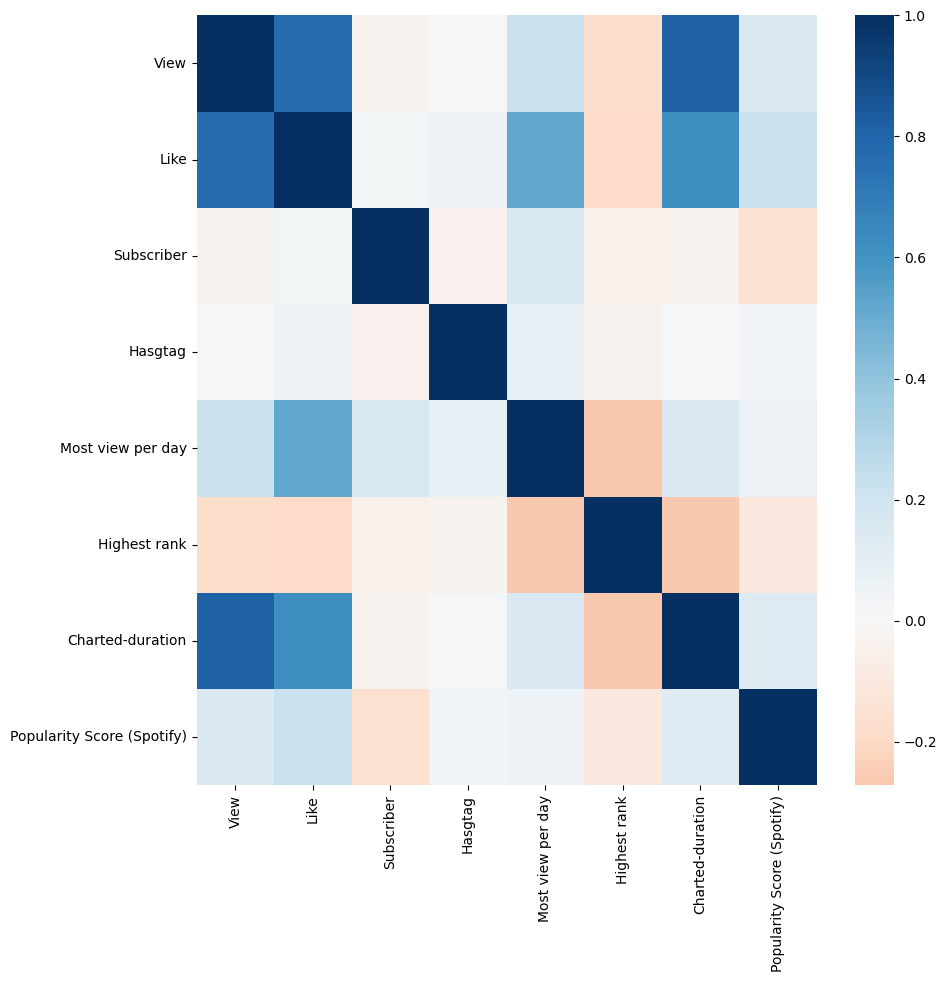

In [5]:
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**Observations**

## Question 1:

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** Do videos with a higher popularity score on Spotify have a higher rank on YouTube?

**Answering this question will** help us to predict the rank of a video if it is published on Youtube since most of the videos nowadays appear on Spotify first.

**How we answer this question**: we will consider the `Popularity Score (Spotify)` and `Highest rank` of all music videos.

### Analyzing to get answer

Step 01: Construct dataframe for `Popularity Score (Spotify)`

In [6]:
# Create dataframe for Popularity
popularity_df = cleaned_df[['Song Name', 'Popularity Score (Spotify)']]

# Sort the rows based of Popularity Score
popularity_df.sort_values('Popularity Score (Spotify)', inplace=True, ascending=False)

# Display
popularity_df.head(10)

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_69876/3764386175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_df.sort_values('Popularity Score (Spotify)', inplace=True, ascending=False)


,Song Name,Popularity Score (Spotify)
1435,All I Want for Christmas Is You,97
651,All I Want for Christmas Is You,97
859,As It Was,94
862,Flowers,93
691,Sweater Weather,93
560,Last Christmas,92
536,Another Love,92
400,Yellow,92
643,Blinding Lights,92
2315,CLASSY 101,91


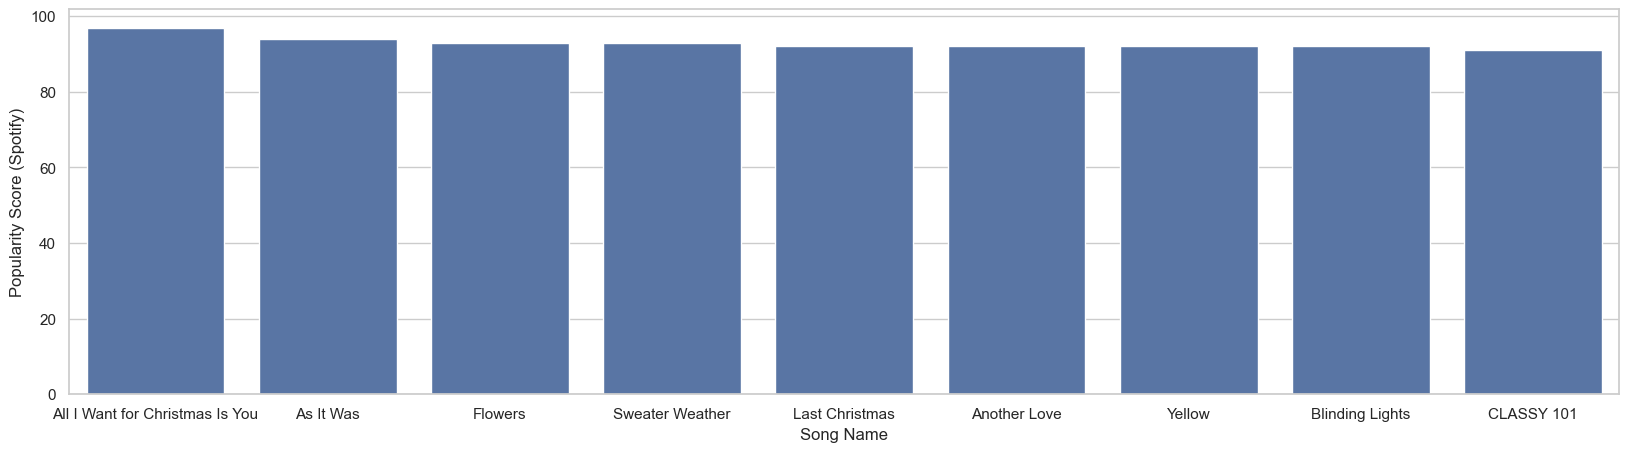

In [7]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=popularity_df.head(10), x="Song Name", y= "Popularity Score (Spotify)")

Step 02: Construct dataframe for `Highest rank`

In [8]:
# Create dataframe for Highest rank
rank_df = cleaned_df[['Song Name', 'Highest rank']]

# Sort the rows based of Highest rank
rank_df.sort_values('Highest rank', inplace=True, ascending=True)

# Display
rank_df.head(10)

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_69876/3095816632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df.sort_values('Highest rank', inplace=True, ascending=True)


,Song Name,Highest rank
0,Gangnam Style (강남스타일),1.0
359,Hawái - Remix,1.0
381,Sexy And I Know It,1.0
386,Wide Awake,1.0
392,What's My Name?,1.0
393,Story of My Life,1.0
1493,Killshot,1.0
405,Memories,1.0
414,Que Tire Pa Lante,1.0
415,We Can't Stop,1.0


Since all of the top 10 Highest rank are all top 1, so we will take a look at the highest rank of top 10 `Popularity Score (Spotify)`

In [9]:
# Create dataframe for Highest rank
rank_df = cleaned_df[['Song Name', 'Highest rank']]

# Create a list of Song Name of Popularity Score
song_names = popularity_df['Song Name'].head(10).to_list()

# Extract song that are in top 10 of Popularity Score (Spotify)
rank_df = rank_df[rank_df['Song Name'].isin(song_names)]

# Sort the rows based of Popularity Score
rank_df.sort_values('Highest rank', inplace=True, ascending=True)

# Display rank
rank_df

,Song Name,Highest rank
859,As It Was,1.0
862,Flowers,1.0
1435,All I Want for Christmas Is You,3.0
560,Last Christmas,7.0
651,All I Want for Christmas Is You,7.0
2315,CLASSY 101,16.0
691,Sweater Weather,21.0
536,Another Love,43.0
643,Blinding Lights,44.0
400,Yellow,98.0


Text(0.5, 1.0, 'Song Ranks')

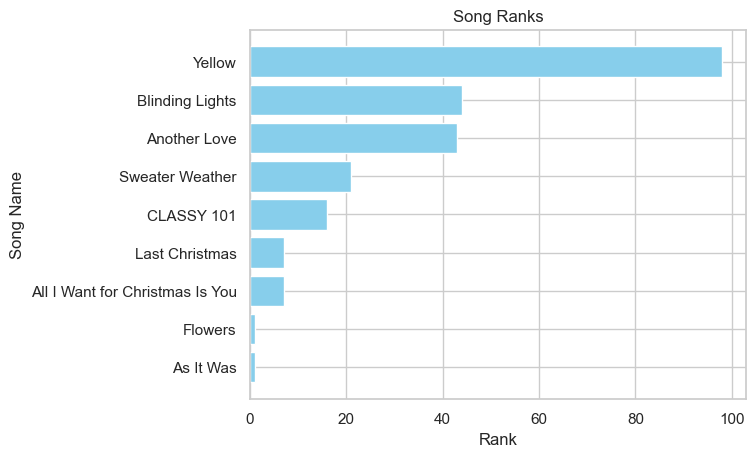

In [10]:
# Create a horizontal bar chart
plt.barh(rank_df['Song Name'], rank_df['Highest rank'], color='skyblue')

# Set labels and title
plt.xlabel('Rank')
plt.ylabel('Song Name')
plt.title('Song Ranks')

**Observations**
- The Popularity Score on Spotify of the top 10 songs are not much different. All the scores are rated pretty high. All I Want for Christmas Is You being placed both 1st and 2nd so there's may be 2 versions of this song. The song with the lowest score in the top 10 is We Can't Stop but its score is still more than 90. 
- However, when it comes to rank on Youtube, some songs don't make it to top 1. The two songs that reached rank 1 on Youtube are Flowers and As It Was. Despite All I Want for Christmas Is You's high score on Spotify, its music video only make to rank 3 on Youtube. And even Yellow is ranked 98 on Youtbe which is quite low. Most of the songs that ranked top 1 don't appear on top 10 Popularity Score on Spotify too.
- There are some explanations:
    - Since singers usually release their music in albums and there is only 1 song is chosen as theme song, the other songs usually don't have an official music video on Youtube, they just have a lyric video so the rank of these songs on Youtube are usually not high.
    - Since Youtube has a lot of kind of videos, if the singer is not famous enough, their music videos usually don't have a high rank. 
    - The number of people watching Youtube is problaly larger than that of Spotify so there are some songs that really famous on Youtube but people don't listen to them on Spotify much.
- So we can conclude that if a song has a high popurality score on Spotify, that not means it has a high rank on Youtube.

## Question 2:

**A possible question is:** What kind of music genre is likely to have a high views on Youtube or have a high Popularity Score on Spotify.

**Answering this question will** help us to know which music genre that people usually listen to. This can help the singers or composers easily to choose what music genre they should make in order to be famous.

**How we answer this question**: we will consider the `Genre` of all music videos. Since the `Genre` is string type, we need to convert it into list first then count for number of each genre.

Step 01: Convert to list

In [19]:
# Create new dataframe Genre
genre_df = pd.DataFrame()

# Taking out Genre column and convert its data type into list
genre_df['Genre'] = cleaned_df['Genre'].apply(ast.literal_eval)

genre_df

,Genre
0,"[k-rap, korean old school hip hop]"
1,[panamanian pop]
2,"[colombian pop, dance pop, latin pop, pop]"
3,"[latin pop, puerto rican pop]"
4,"[canadian pop, pop]"
...,...
2495,"[desi pop, filmi, punjabi pop]"
2496,[modern country pop]
2497,"[agronejo, arrocha, sertanejo, sertanejo unive..."
2498,"[canadian pop, pop]"


Step 02: Count for each genre

In [25]:
# Flatten the list of genres in each row
flat_genres = [genre for genres_list in genre_df['Genre'] for genre in genres_list]

# Count occurrences of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Create dataframe
df = pd.DataFrame(genre_counts)
df

,count
pop,690
urbano latino,319
reggaeton,289
dance pop,274
trap latino,267
...,...
german pop,1
lo-fi cover,1
turkish edm,1
oxford indie,1


Step 03: Visualization

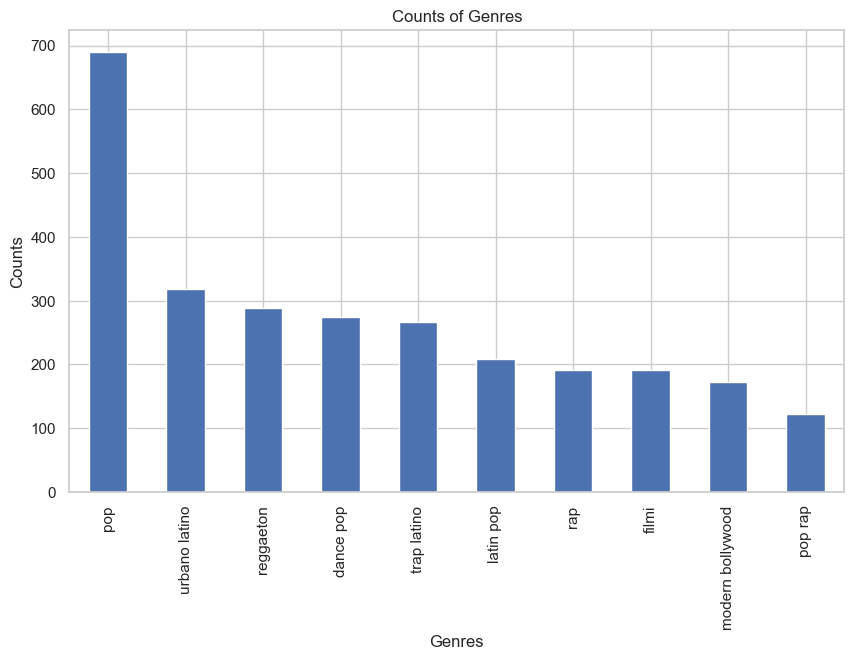

In [27]:
# Plot the bar chart
ax = df.head(10).plot(kind='bar', legend=False, figsize=(10, 6))

# Customize the plot
ax.set_ylabel('Counts')
ax.set_xlabel('Genres')
ax.set_title('Counts of Genres')

# Show the plot
plt.show()

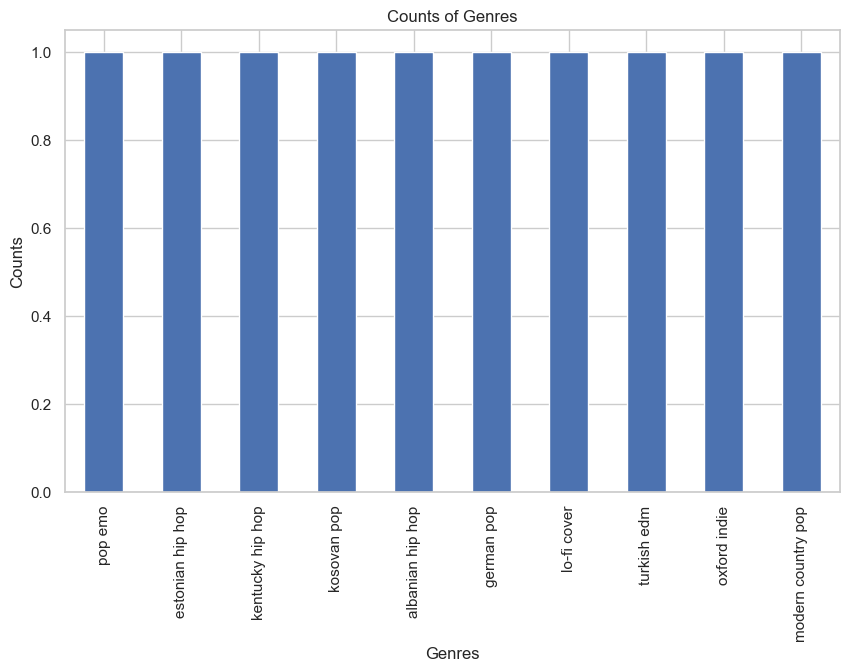

In [28]:
# Plot the bar chart
ax = df.tail(10).plot(kind='bar', legend=False, figsize=(10, 6))

# Customize the plot
ax.set_ylabel('Counts')
ax.set_xlabel('Genres')
ax.set_title('Counts of Genres')

# Show the plot
plt.show()

**Observarions**
- It can be seen that pop is the most popular genre with a approximately 700 songs are in pop. This number is much higher when compared with other kind of genres. It is double of counts for urbano latino which place 2nd after pop. There are also other kinds of pop including dance pop, latino pop and rap pop are in top 10. 
- The genres of our data are also diverse with total 596 kind of music genres.
- Many kinds of latin music also appear in the top 10 such as: urbano latino, trap latino and latin pop. 
- There are other kinds of genre that are not pretty famous but this is also a unique ones since the music video using these kings of genre also well known.
- In conclusion, if a singer want to choose a music genre that easily approach the audience, he or she should sing pop music.